In [276]:
#load dataframe (pkl)
#summarize some examples, crop them using contours
#high score/ low score/ one high one low
#anything that stands out

#a window that is bigger than nuclei (square window 100 by 100), all crops have the same size
#just crop raw imgae, and draw with python for GT and Predicted (different color)

In [307]:
import pandas as pd
import os
import numpy as np
import cv2
import json
import glob
import matplotlib.pyplot as plt
import tqdm
from PIL import Image


In [308]:
path_idx = 1
src = r'\\fatherserverdw\Q\research\images\skin_aging\hovernet_tile\hovernet_manual_validation'
#manual = os.path.join(src,'manual_annotation')
#predicted = os.path.join(src,'predicted_nuclei_contour')
raw_ims = os.path.join(src,'raw_image')
raw_path = glob.glob(os.path.join(raw_ims,'*.tif'))

img_names = os.listdir(raw_ims)

In [309]:
#load dataframe
pth = r'C:\Users\kyuha\PycharmProjects\wsi_analysis\kyu\under_development'
df_paths = glob.glob(os.path.join(pth,'*.pkl'))
scores = pd.DataFrame(index =img_names,columns= {'h_jaccard_score','h_dice1','l_jaccard_score','l_dice1','s_jaccard_score','s_dice1'})

In [286]:
#for path_idx in range (0,6):
path_idx = 1
df = pd.read_pickle(df_paths[path_idx])
raw_img = Image.open(raw_path[path_idx])

In [295]:
df

,contour,centroid,pred_contour,pred_centroid,jaccard_score,dice1,precision,recall
0,"[[368, 427], [368, 428], [367, 428], [366, 429...","(369.93939393939394, 438.969696969697)","[[369, 428], [367, 430], [367, 431], [366, 432...","[370, 439]",0.776923,0.872570,1.000000,0.776923
1,"[[242, 339], [241, 340], [239, 340], [238, 341...","(242.16666666666666, 346.2142857142857)","[[242, 338], [241, 339], [239, 339], [238, 340...","[242, 346]",0.890152,0.940000,0.955285,0.928854
2,"[[168, 364], [167, 365], [166, 365], [166, 366...","(172.02564102564102, 371.64102564102564)","[[172, 363], [171, 364], [169, 364], [168, 365...","[173, 372]",0.854305,0.919786,0.966292,0.880546
3,"[[322, 384], [321, 385], [320, 385], [319, 386...","(325.8695652173913, 392.4130434782609)","[[321, 384], [320, 385], [319, 385], [316, 388...","[325, 392]",0.815873,0.897033,0.955390,0.848185
4,"[[387, 334], [387, 335], [386, 335], [386, 336...","(390.0408163265306, 342.7959183673469)","[[391, 334], [390, 335], [388, 335], [387, 336...","[390, 343]",0.821429,0.900489,0.992806,0.826347
...,...,...,...,...,...,...,...,...
379,"[[230.0, 311.0], [230.0, 313.0], [233.0, 313.0...","(248.45238095238096, 313.3095238095238)","[[242, 338], [241, 339], [239, 339], [238, 340...","[242, 346]",0.000000,0.000000,0.000000,0.000000
380,"[[370, 314], [370, 315], [369, 315], [369, 317...","(390.7014925373134, 322.2089552238806)","[[360, 314], [359, 315], [357, 315], [356, 316...","[377, 320]",0.541069,0.701606,0.585331,0.877378
381,"[[959.0, 403.0], [959.0, 404.0], [957.0, 404.0...","(961.75, 413.4935897435897)","[[957, 405], [956, 406], [954, 406], [952, 408...","[960, 413]",0.730627,0.843450,0.987531,0.737430
382,"[[543, 354], [543, 355], [542, 355], [542, 356...","(547.936170212766, 360.7659574468085)","[[545, 354], [544, 355], [542, 355], [540, 357...","[549, 361]",0.890977,0.940476,0.987500,0.901141


In [300]:
temp = np.zeros(shape=(raw_img.size))
for idx,row in df.iterrows():
    cv2.fillPoly(temp, pts=[(row['contour']).astype(np.int32)],color=1)

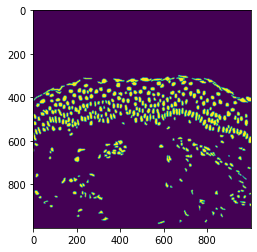

In [301]:
plt.imshow(temp)

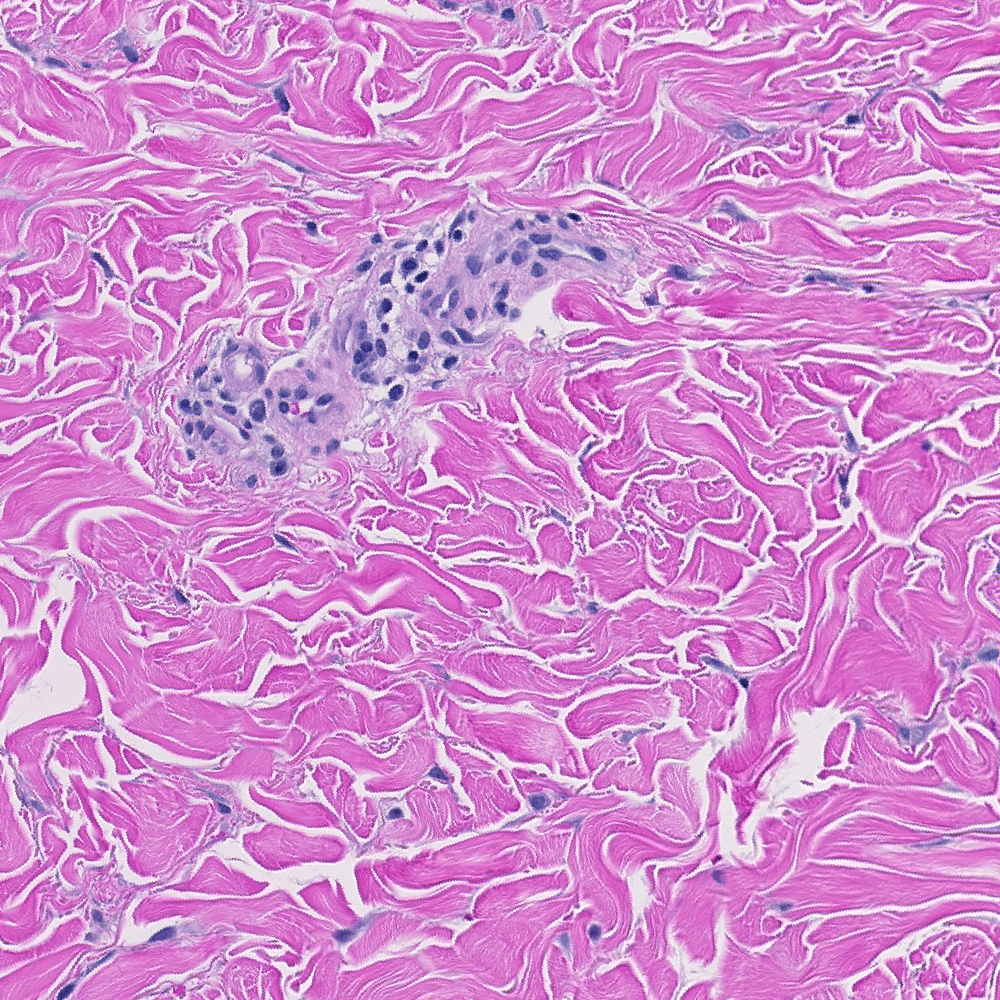

In [294]:
raw_img

In [290]:
h_idx = 1
df2 = df.sort_values('jaccard_score',ascending=False,ignore_index=True)
strange = []
for idx,row in df2.iterrows():
    if abs(row['jaccard_score'] - row['dice1']) > 0.17:

        strange.append(row)
#pick one high and one low
col = df2.iloc[h_idx]
h_man_ct = col['contour']
h_pred_ct = col['pred_contour']
h_ja_score = col['jaccard_score']
h_dice1 = col['dice1']
h_cent = col['centroid']

l_col = df2.iloc[len(df2.index)-1]
l_man_ct = l_col['contour']
l_pred_ct = l_col['pred_contour']
l_ja_score = l_col['jaccard_score']
l_dice1 = l_col['dice1']
l_cent = l_col['centroid']

if(len(strange)!= 0 ):
    s_col = strange[0]
    s_man_ct = s_col['contour']
    s_pred_ct = s_col['pred_contour']
    s_ja_score = s_col['jaccard_score']
    s_dice1 = s_col['dice1']
    s_cent = s_col['centroid']

#crop raw img 100x100 l,t,r,b
h_bbox = [h_cent[0]-50,h_cent[1]-50,h_cent[0]+ 50,h_cent[1]+50]
l_bbox = [l_cent[0]-50,l_cent[1]-50,l_cent[0]+ 50,l_cent[1]+50]
s_bbox = [s_cent[0]-50,s_cent[1]-50,s_cent[0]+ 50,s_cent[1]+50]

#draw pologons
raw_arr = np.array(raw_img)

#h_mask = cv2.fillPoly(raw_arr, pts=[np.array(h_man_ct).astype(np.int32)],color=(0,255,0))
h_mask = cv2.drawContours(raw_arr,[np.array(h_man_ct).astype(np.int32)],-1,(0,255,0),1)
h_mask = cv2.drawContours(h_mask,[np.array(h_pred_ct).astype(np.int32)],-1,(255,0,0),1)
img= Image.fromarray(h_mask)
h_crop = img.crop(h_bbox)

#low score
raw_arr2 = np.array(raw_img)
#l_mask = cv2.fillPoly(raw_arr2, pts=[np.array(l_man_ct).astype(np.int32)],color=(0,255,0))
l_mask = cv2.drawContours(raw_arr,[np.array(l_man_ct).astype(np.int32)],-1,(0,255,0),1)
l_mask = cv2.drawContours(l_mask,[np.array(l_pred_ct).astype(np.int32)],-1,(255,0,0),1)
img2= Image.fromarray(l_mask)
l_crop = img2.crop(l_bbox)

raw_arr3 = np.array(raw_img)
#l_mask = cv2.fillPoly(raw_arr2, pts=[np.array(l_man_ct).astype(np.int32)],color=(0,255,0))
s_mask = cv2.drawContours(raw_arr3,[np.array(s_man_ct).astype(np.int32)],-1,(0,255,0),1)
s_mask = cv2.drawContours(s_mask,[np.array(s_pred_ct).astype(np.int32)],-1,(255,0,0),1)
img3= Image.fromarray(s_mask)
s_crop = img3.crop(s_bbox)


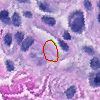

In [291]:
h_crop

In [ ]:


folder_dir = r'C:\Users\kyuha\Desktop\nuclei_crop_temp'
h_crop.save(os.path.join(folder_dir,os.path.basename(raw_path[path_idx]).split(('.'))[0]+'_high.png'))
l_crop.save(os.path.join(folder_dir,os.path.basename(raw_path[path_idx]).split(('.'))[0]+'_low.png'))
s_crop.save(os.path.join(folder_dir,os.path.basename(raw_path[path_idx]).split(('.'))[0]+'_strange.png'))

scores.loc[img_names[path_idx]] = [h_ja_score,h_dice1,l_ja_score,l_dice1,s_ja_score,s_dice1]

In [310]:
for path_idx in range (0,6):
    df = pd.read_pickle(df_paths[path_idx])
    raw_img = Image.open(raw_path[path_idx])

    df2 = df.sort_values('jaccard_score',ascending=False,ignore_index=True)
    strange = []
    for idx,row in df2.iterrows():
        if abs(row['jaccard_score'] - row['dice1']) > 0.17:

            strange.append(row)
    #pick one high and one low
    col = df2.iloc[0]
    h_man_ct = col['contour']
    h_pred_ct = col['pred_contour']
    h_ja_score = col['jaccard_score']
    h_dice1 = col['dice1']
    h_cent = col['centroid']

    l_col = df2.iloc[len(df2.index)-1]
    l_man_ct = l_col['contour']
    l_pred_ct = l_col['pred_contour']
    l_ja_score = l_col['jaccard_score']
    l_dice1 = l_col['dice1']
    l_cent = l_col['centroid']

    if(len(strange)!= 0 ):
        s_col = strange[0]
        s_man_ct = s_col['contour']
        s_pred_ct = s_col['pred_contour']
        s_ja_score = s_col['jaccard_score']
        s_dice1 = s_col['dice1']
        s_cent = s_col['centroid']

    #crop raw img 100x100 l,t,r,b
    h_bbox = [h_cent[0]-50,h_cent[1]-50,h_cent[0]+ 50,h_cent[1]+50]
    l_bbox = [l_cent[0]-50,l_cent[1]-50,l_cent[0]+ 50,l_cent[1]+50]
    s_bbox = [s_cent[0]-50,s_cent[1]-50,s_cent[0]+ 50,s_cent[1]+50]

    #draw pologons
    raw_arr = np.array(raw_img)

    #h_mask = cv2.fillPoly(raw_arr, pts=[np.array(h_man_ct).astype(np.int32)],color=(0,255,0))
    h_mask = cv2.drawContours(raw_arr,[np.array(h_man_ct).astype(np.int32)],-1,(0,255,0),1)
    h_mask = cv2.drawContours(h_mask,[np.array(h_pred_ct).astype(np.int32)],-1,(255,0,0),1)
    img= Image.fromarray(h_mask)
    h_crop = img.crop(h_bbox)

    #low score
    raw_arr2 = np.array(raw_img)
    #l_mask = cv2.fillPoly(raw_arr2, pts=[np.array(l_man_ct).astype(np.int32)],color=(0,255,0))
    l_mask = cv2.drawContours(raw_arr,[np.array(l_man_ct).astype(np.int32)],-1,(0,255,0),1)
    l_mask = cv2.drawContours(l_mask,[np.array(l_pred_ct).astype(np.int32)],-1,(255,0,0),1)
    img2= Image.fromarray(l_mask)
    l_crop = img2.crop(l_bbox)

    raw_arr3 = np.array(raw_img)
    #l_mask = cv2.fillPoly(raw_arr2, pts=[np.array(l_man_ct).astype(np.int32)],color=(0,255,0))
    s_mask = cv2.drawContours(raw_arr3,[np.array(s_man_ct).astype(np.int32)],-1,(0,255,0),1)
    s_mask = cv2.drawContours(s_mask,[np.array(s_pred_ct).astype(np.int32)],-1,(255,0,0),1)
    img3= Image.fromarray(s_mask)
    s_crop = img3.crop(s_bbox)



    folder_dir = r'C:\Users\kyuha\Desktop\nuclei_crop_temp'
    h_crop.save(os.path.join(folder_dir,os.path.basename(raw_path[path_idx]).split(('.'))[0]+'_high.png'))
    l_crop.save(os.path.join(folder_dir,os.path.basename(raw_path[path_idx]).split(('.'))[0]+'_low.png'))
    s_crop.save(os.path.join(folder_dir,os.path.basename(raw_path[path_idx]).split(('.'))[0]+'_strange.png'))

#ToDo: this column is not outputed in order, something is wrong, need to fix!
    scores.loc[img_names[path_idx]] = [h_ja_score,h_dice1,l_ja_score,l_dice1,s_ja_score,s_dice1]

In [313]:
scores.to_excel(os.path.join(folder_dir,'scores.xlsx'))